# **Sample Project: Facial Emotion Detection**

## **data description**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Objective:**
My objective is to built a deep learning model that detects emotions in image data previously unseen by the model and classifies them as accurately as possible into one of the four categories: happy, neutral, sad and surprised. I will focus on (validation and test) accuracy as a performance metric to measure wether I have reached my goal and to compare different deep learning models. I focus on accuracy instead of e.g. precision or recall as a performance metric because I do not want to avoid false positives or false negatives specifically and I focus on accuracy on the validation and test set because I am interested in how well my models categorizes emotions on unseen data.

## **Mounting the drive on colab and importing libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!pip install tensorflow

In [4]:
import keras

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

import zipfile
import os

import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import GlobalAveragePooling2D

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import random

from tensorflow.keras import backend

from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications import ResNet50V2

from keras.models import Model


import pickle

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras import layers
from keras import ops

import warnings

In [ ]:
warnings.filterwarnings("ignore") # ignoring filter warnings

## **Defining Functions**

defining a function to plot the learning curves: training and validation accuracy

In [6]:
def plotAccuracy(history):

  plt.plot(history['accuracy'])     # plotting training accuracy

  plt.plot(history['val_accuracy'])     # plotting validation accuracy

  plt.ylabel('Accuracy')

  plt.xlabel('Epoch')

  plt.legend(['Train', 'Validation'], loc = 'lower right')

  plt.show()

defining a function to plot the classification report and confusion matrix

In [7]:
def printConfusionClassification(true_labels,predicted_labels):

  print(classification_report(true_labels, predicted_labels)) # classification report

  cm = confusion_matrix(true_labels, predicted_labels)  # confusion matrix

  # plotting the confusion matrix in a heatmap
  plt.figure(figsize = (8, 5))

  sns.heatmap(cm, annot = True, fmt = '.0f') # annotated heatmap showing whole numbers

  plt.ylabel('Actual')

  plt.xlabel('Predicted')

  plt.show()

defining a function to plot the distribution of labels in the train, validation and test data

In [8]:
def plotLabelDistribution(label_dist, color):
  plt.figure()
  bars = plt.bar(labels, label_dist, color=[color]) # plot of the distribution of the labels as a bar plot

  for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')    # annotating the bars with their height - how many images for each label

  plt.xlabel("Labels")
  plt.ylabel("No of images")
  plt.show()

## **Loading and unzipping the data**

In [9]:
path = '/content/drive/MyDrive/Colab Notebooks/Week 10+: Capstone Project/Facial_emotion_images.zip'

# Extracting the data from the zip file once:
#with zipfile.ZipFile(path, 'r') as zip_ref:
 #   zip_ref.extractall()

In [10]:
# Parent directory where images are stored in drive
parent_dir = '/content/drive/MyDrive/Colab Notebooks/Week 10+: Capstone Project/Facial_emotion_images'

# Path to the training and testing datasets within the parent directory
train_dir = os.path.join(parent_dir, 'train')
validation_dir = os.path.join(parent_dir, 'validation')
test_dir = os.path.join(parent_dir, 'test')

# Directory with our training pictures
train_happy_dir = os.path.join(train_dir, 'happy')
train_neutral_dir = os.path.join(train_dir, 'neutral')
train_sad_dir = os.path.join(train_dir, 'sad')
train_surprise_dir = os.path.join(train_dir, 'surprise')

# Directory with validation pictures
val_happy_dir = os.path.join(validation_dir, 'happy')
val_neutral_dir = os.path.join(validation_dir, 'neutral')
val_sad_dir = os.path.join(validation_dir, 'sad')
val_surprise_dir = os.path.join(validation_dir, 'surprise')

# Directory with test pictures
test_happy_dir = os.path.join(test_dir, 'happy')
test_neutral_dir = os.path.join(test_dir, 'neutral')
test_sad_dir = os.path.join(test_dir, 'sad')
test_surprise_dir = os.path.join(test_dir, 'surprise')

In [11]:
# creating lists of file names of the training pictures of each class
train_happy_file_names = os.listdir(train_happy_dir)
train_neutral_file_names = os.listdir(train_neutral_dir)
train_sad_file_names = os.listdir(train_sad_dir)
train_surprise_file_names = os.listdir(train_surprise_dir)

## **Data Visualization**

### **Happy**

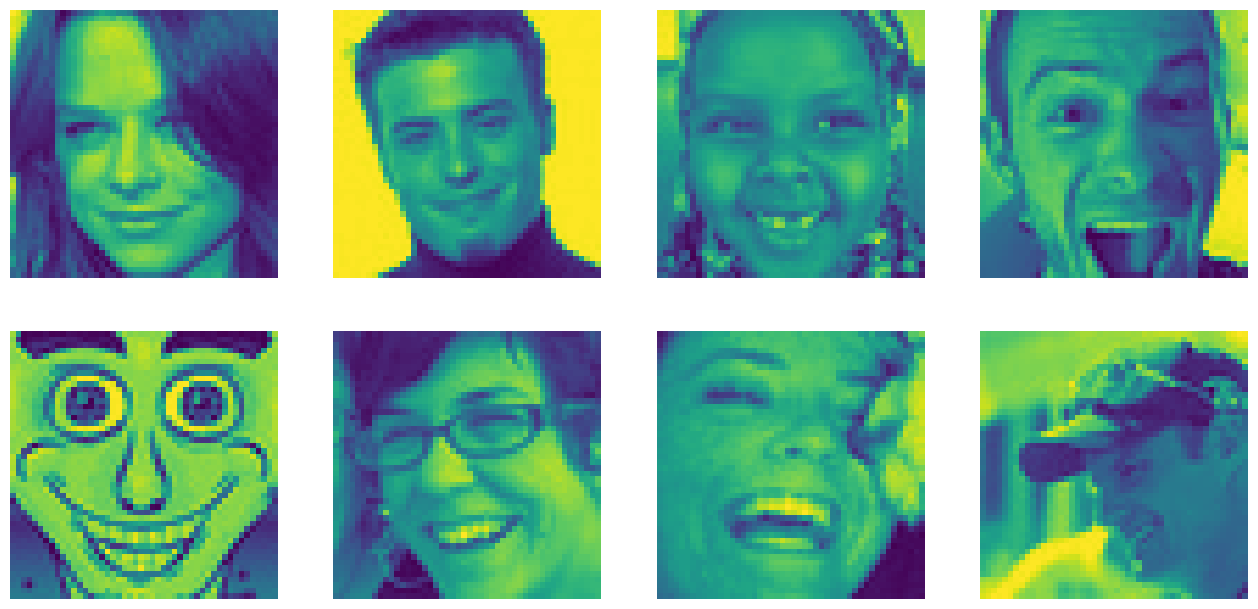

In [12]:
fig = plt.figure(figsize=(16, 16))          # defining the plot grid

happy_img_paths = [os.path.join(train_happy_dir, file_name) for file_name in train_happy_file_names[:8]]  # path to the first 8 images in the happy subfolder

for i, img_path in enumerate(happy_img_paths):        # enumerating over the paths to the 8 images
  ax = plt.subplot(4, 4, i + 1)                       # adding subplot for each image
  ax.axis('Off')

  img = mpimg.imread(img_path)                        # plotting the images
  plt.imshow(img)

plt.show()


- images labeled as happy show portraits of smiling faces
- different genders, races and age groups are shown
- smiles are different - from slight closed-lipped smiles to smiles showing teeth or happy exited open-mouthed expressions and laughing faces
- not all images show humans - there are drawings of laughing cartoons included in the data

### **Sad**

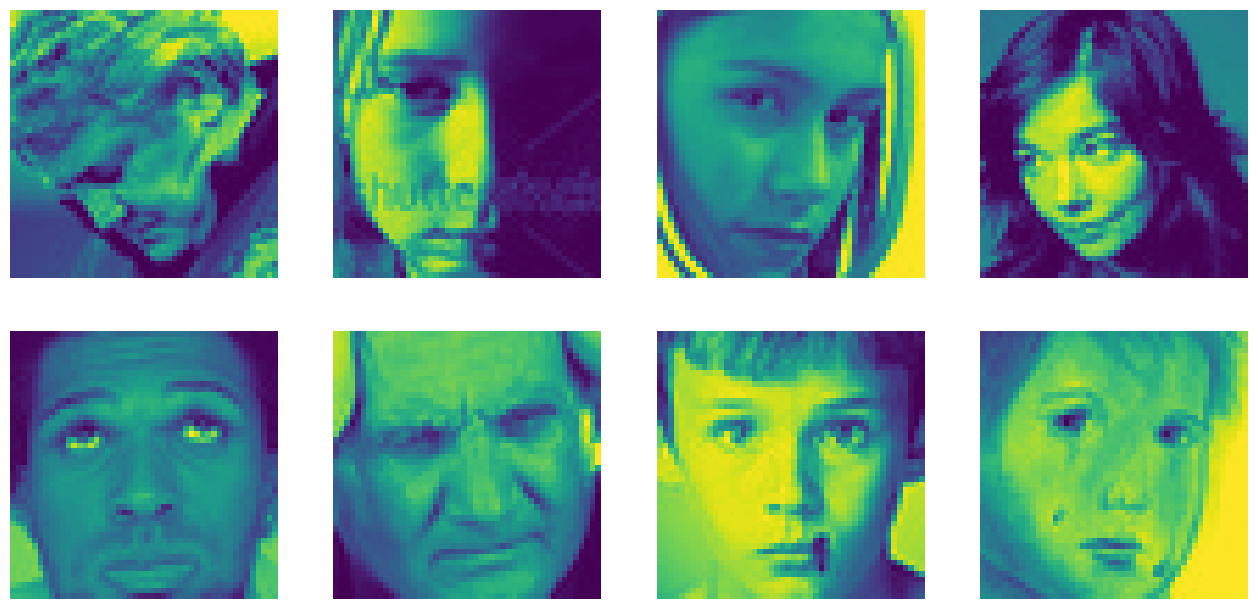

In [13]:
fig = plt.figure(figsize=(16, 16))

sad_img_paths = [os.path.join(train_sad_dir, file_name) for file_name in train_sad_file_names[:8]]

for i, img_path in enumerate(sad_img_paths):
  ax = plt.subplot(4, 4, i + 1)
  ax.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

- images labeled as sad show serious expressions, downturned eyes/faces or scrunched-up expressions or crying faces
- for some images the facial expression is not as clearly sad as for others - for example the expression in the women's faces in the third and fourth image is more neutral than sad
- unique features: downcast eyes, turned-down faces, corners of the mouth pointing down, wrinkeled foreheads

### **Neutral**

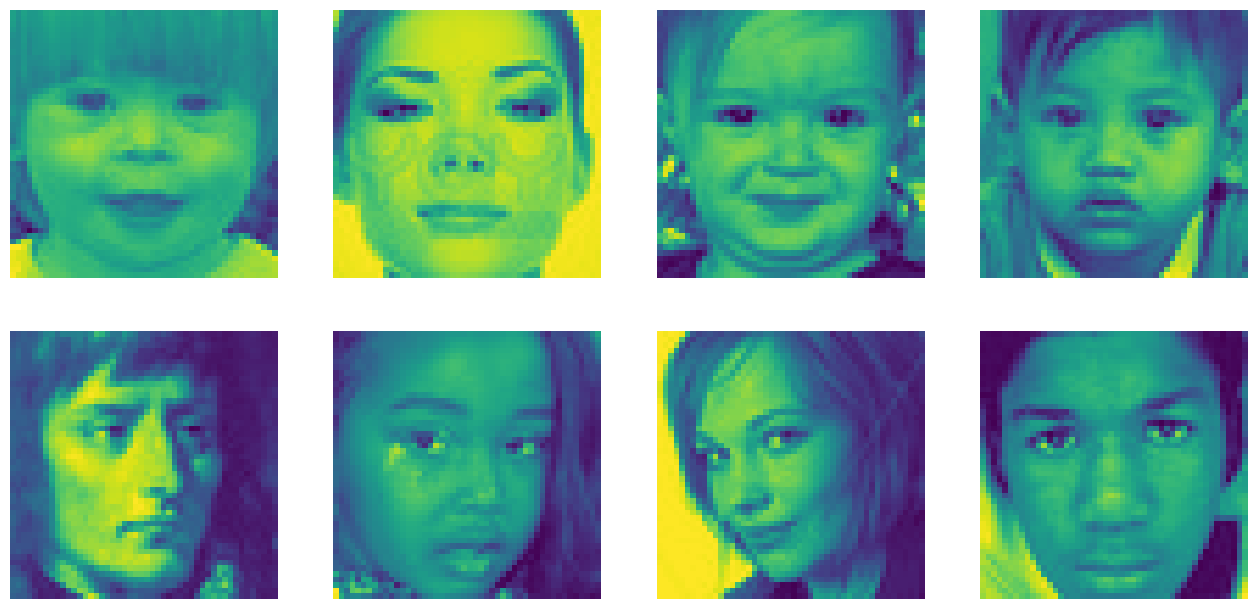

In [14]:
fig = plt.figure(figsize=(16, 16))

neutral_img_paths = [os.path.join(train_neutral_dir, file_name) for file_name in train_neutral_file_names[:8]]

for i, img_path in enumerate(neutral_img_paths):
  ax = plt.subplot(4, 4, i + 1)
  ax.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

- no prominent expressions shown in the images labeled as neutral
- face muscles in the images are in relaxed positions (e.g. corners of mouth are neither turned down or up, forehead is smooth, eyebrows are neither bunched together, now raised etc.)
- faces look either straight into the camera or gaze is pointed somewhere off-camera
- the expressions of the infants shown in image 1, 3 and 4 vary - to me the child in the first image looks happy and the child in the third image looks unhappy. This illustrates that the labels that have been applied here are very subjective.
- it is hard to identify any prominent features here that all images shapre except for the lack of any clear expression

### **Surprised**

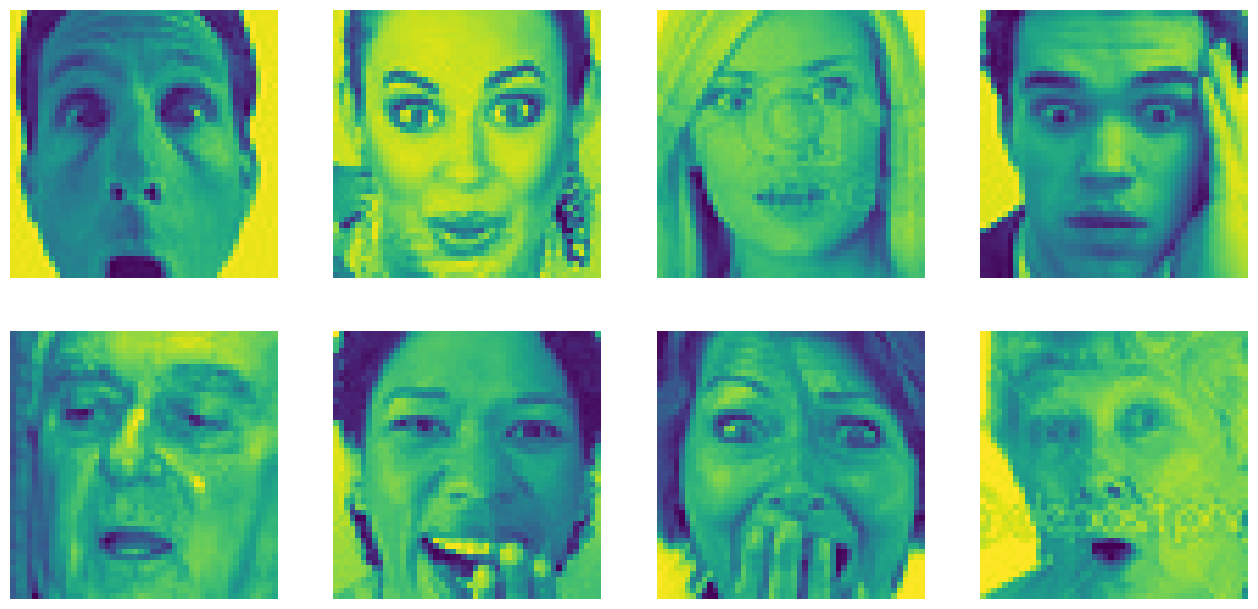

In [15]:
fig = plt.figure(figsize=(16, 16))

surprise_img_paths = [os.path.join(train_surprise_dir, file_name) for file_name in train_surprise_file_names[:8]]

for i, img_path in enumerate(surprise_img_paths):
  ax = plt.subplot(4, 4, i + 1)
  ax.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

- faces labeled as surprised show similar expressions:
 - often open mouths
 - often wide eyes and raised eyebrows
 - sometimes hands are raised in front of the mouths
 - it is (sometimes) distinguishable if the surprise is happy or not: corners of mouth are turned upwards in some pictures

**General observations:**
- images have variety in different versions of the respective emotions shown (e.g. for happy: smiling a bit and laughing broadly)
- images have variety in the persons portrayed with respect to gender, race and age
- images have a bit of variety in style: faces are shown at different angles and with different zooms
- there are some problems with the data, that might impact model performance:
  - some images seem to not show humans but cartoons - data is not clean
  - some expressions are ambiguous leading to very subjective labeling
- also the heterogeneity of the images (angle the photo was taken, variety in faces portrayed and variety of expressions within the same emotion class) make the problem more complex for a deep learning model to learn

## **Checking Distribution of Classes**

In [16]:
# creating lists of file names for the validation and test directory as well

val_happy_file_names = os.listdir(val_happy_dir)
val_neutral_file_names = os.listdir(val_neutral_dir)
val_sad_file_names = os.listdir(val_sad_dir)
val_surprise_file_names = os.listdir(val_surprise_dir)

test_happy_file_names = os.listdir(test_happy_dir)
test_neutral_file_names = os.listdir(test_neutral_dir)
test_sad_file_names = os.listdir(test_sad_dir)
test_surprise_file_names = os.listdir(test_surprise_dir)

In [17]:
labels = ["happy", "neutral", "sad", "surprised"]      # hardcoding the labels

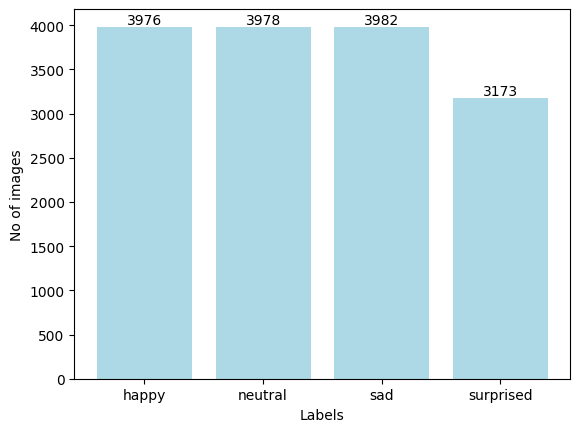

Total size of training data: 15109


In [18]:
train_label_dist = [len(train_happy_file_names), len(train_neutral_file_names), len(train_sad_file_names), len(train_surprise_file_names)]  # making list of the different lengths of the files lists

plotLabelDistribution(train_label_dist, 'lightblue')

# printing size of the training data in total:
print("Total size of training data:", len(train_happy_file_names) + len(train_neutral_file_names) + len(train_sad_file_names) + len(train_surprise_file_names))

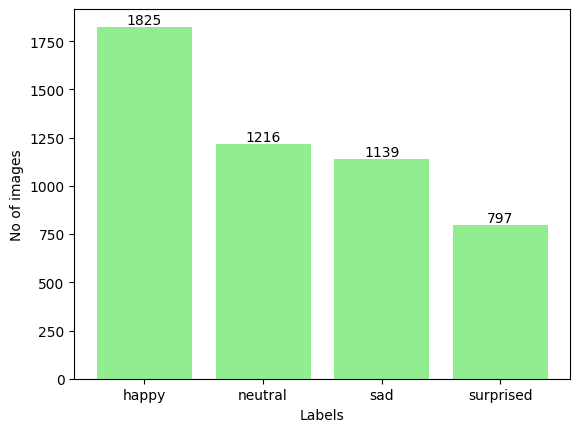

Total size of validation data: 4977


In [19]:
val_label_dist = [len(val_happy_file_names), len(val_neutral_file_names), len(val_sad_file_names), len(val_surprise_file_names)]  # making list of the different lengths of the files lists

plotLabelDistribution(val_label_dist,'lightgreen')

# printing size of the validation data in total:
print("Total size of validation data:", len(val_happy_file_names) + len(val_neutral_file_names) + len(val_sad_file_names) + len(val_surprise_file_names))

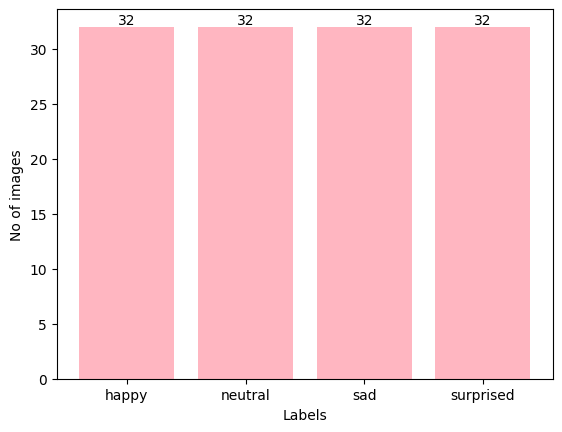

Total size of test data: 128


In [20]:
test_label_dist = [len(test_happy_file_names), len(test_neutral_file_names), len(test_sad_file_names), len(test_surprise_file_names)]  # making list of the different lengths of the files lists

plotLabelDistribution(test_label_dist,'lightpink')

# printing size of the test data in total:
print("Total size of test data:", len(test_happy_file_names) + len(test_neutral_file_names) + len(test_sad_file_names) + len(test_surprise_file_names))


- The classes are not equally distributed in the training and validation data, especiall the class "surprise" is underrepresented in those sets. This might lead to lower accuracy of models I built for this class.

- another EDA task here that might provide meaningful results would be to also visualize images in the validation and test set to see if they show problems similar to the images in the training set. Also printing the shape of the images makes sense, since image shape needs to match the input shape expected by the model (or vice versa)

- sensible data preprocessing steps for this dataset would be:
  - cleaning the data of images not showing human faces
  - adding more data to the test set if possible
  - resampling the data for the "surprise" class
  - quality checking the labels if feasible

**Shape and size of the images:**

In [21]:
image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Week 10+: Capstone Project/Facial_emotion_images/train/happy/15855.jpg')
image.shape

(48, 48)

Images are two-dimensional (on a grayscale) with 48x48 pixels.

## **Creating Data Loaders**

Note: I tried importing the training data without data augmentation first, but discarded the generator without augmentation due to bad performance when training with the unaugmented data

**First loader with color mode = "grayscale"**

In [22]:

#train_datagen1 = ImageDataGenerator(rescale=1. / 255.0)  # rescaling to scale between 0 and 1 - first generator without any data augmentation


val_test_datagen1  = ImageDataGenerator(rescale = 1.0/255.)     # creating a separate Generator for train and validation set without data augmentation



# Flowing training images in batches of 128 using train_datagen generator

#train_generator1 = train_datagen1.flow_from_directory(train_dir,
#                                                    batch_size=128,                # read in images in batches
#                                                    class_mode='categorical',
#                                                    color_mode = 'grayscale',
#                                                    target_size=(48,48),
#                                                    classes = ["happy","neutral","sad","surprise"]
#                                                      )


# Flowing validation images in batches of 128 using test_datagen generator
validation_generator1 =  val_test_datagen1.flow_from_directory(validation_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'grayscale',
                                                         target_size=(48,48),
                                                         classes = ["happy","neutral","sad","surprise"]
                                                               )


# Flowing validation images in batches of 128 using test_datagen generator
test_generator1 =  val_test_datagen1.flow_from_directory(test_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'grayscale',
                                                         target_size=(48,48),
                                                         classes = ["happy","neutral","sad","surprise"],
                                                         shuffle=False
                                                         )

Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [23]:
# defining the ImageDataGenerator with data augmentation to help with generalization and overall performance
train_datagen1a = ImageDataGenerator(rescale=1. / 255.0,
                                    horizontal_flip = True,
                                    vertical_flip = False,
                                    height_shift_range= 0.1,    # shifting image height
                                    width_shift_range=0.1,      # shifting image width
                                    rotation_range=20,          # rotating the images
                                    shear_range = 0.1,          # slant image in particular way
                                    zoom_range=0.1)             # zoom images





train_generator1a = train_datagen1a.flow_from_directory(train_dir,
                                                    batch_size=128,                # read in images in batches
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(48,48),
                                                    classes = ["happy","neutral","sad","surprise"]
                                                        )


Found 15109 images belonging to 4 classes.


**Second loader with color_mode = 'rgb'**

In [24]:
# Flowing training images using train_datagen generator
#train_generator2 = train_datagen1.flow_from_directory(train_dir,
#                                                    batch_size=128,                # read in images in batches
#                                                    class_mode='categorical',
#                                                    color_mode = 'rgb',
#                                                      target_size=(48,48),
#                                                      classes = ["happy","neutral","sad","surprise"]
#                                                      )

train_generator2a = train_datagen1a.flow_from_directory(train_dir,
                                                    batch_size=128,                # read in images in batches
                                                    class_mode='categorical',
                                                    color_mode = 'rgb',
                                                     target_size=(48,48),
                                                     classes = ["happy","neutral","sad","surprise"]
                                                        )

# Flowing validation images using test_val_datagen generator
validation_generator2 =  val_test_datagen1.flow_from_directory(validation_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'rgb',
                                                         target_size=(48,48),
                                                          classes = ["happy","neutral","sad","surprise"]
                                                               )


# Flowing validation images using test_val_datagen generator
test_generator2 =  val_test_datagen1.flow_from_directory(test_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'rgb',
                                                         target_size=(48,48),
                                                         classes = ["happy","neutral","sad","surprise"],
                                                         shuffle=False
                                                         )

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


**Shapes of the 2 different training batches:**

In [25]:
images, labels = next(train_generator1a)
print(images.shape)

(128, 48, 48, 1)


In [26]:
images, labels = next(train_generator2a)
print(images.shape)

(128, 48, 48, 3)


## **Model Building**

### **Creating the Base Neural Network**

In [27]:
# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

**Fitting the model with the color_mode = "grayscale" data**

In [28]:
def cnn_model_1():

  cnn_1 = Sequential()                                                                                # sequential model
  cnn_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1)))  # first convolutional layer with 16 filters and grayscale input
  cnn_1.add(BatchNormalization())
  cnn_1.add(LeakyReLU(0.1))                                                                           # first leaky ReLU layer
  cnn_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))                             # second convolutional layer with 32 filters
  cnn_1.add(BatchNormalization())
  cnn_1.add(LeakyReLU(0.1))                                                                           # second leaky ReLU layer
  cnn_1.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features
  cnn_1.add(GlobalAveragePooling2D())                                                                 # Global Average Pooling to prepare for Dense layers
  #cnn_1.add(Flatten())
  cnn_1.add(Dense(32))                                                                                # dense hidden layer
  cnn_1.add(LeakyReLU(0.1))
  cnn_1.add(Dense(4, activation = 'softmax'))


  return cnn_1

In [29]:
cnn1 = cnn_model_1()
print(cnn1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,180 (24.14 KB)

 Trainable params: 6,084 (23.77 KB)

 Non-trainable params: 96 (384.00 B)

None


### **Compiling and Training the Model**

In [30]:
cnn1.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])

**Please note:**
- I am commenting out the training step after fitting the model and only load the model from drive when I rerun the notebook
- due to runtime issues I am exprerimenting with the steps per epoch and validation_steps I use when training the different models. I am aware that this makes training less stable / makes validation less representative respectively, which is why I avoid it when I can and use it when I have to, based on model complexity and computational resources available, even if this approach makes performance less comparable between models.

In [31]:
# Train model using dataset
#history1 = cnn1.fit(train_generator1a, validation_data=validation_generator1, batch_size=128,
#                    steps_per_epoch=10,        # training on only 10 batches per epoch for speed
#                    validation_steps=5,
#                    epochs=10)

In [32]:
# Saving the weights and architecture to google drive
#cnn1.save('/content/drive/MyDrive/cnn1.h5')


# saving the history to be able to plot the learning rate later
#with open('/content/drive/MyDrive/history1.pkl', 'wb') as f:
#    pickle.dump(history1.history, f)

In [33]:
# loading the model back
cnn1 = keras.models.load_model('/content/drive/MyDrive/cnn1.h5')

# reloading the history
with open('/content/drive/MyDrive/history1.pkl', 'rb') as f:
    history1 = pickle.load(f)


**Assessing model accuracy**

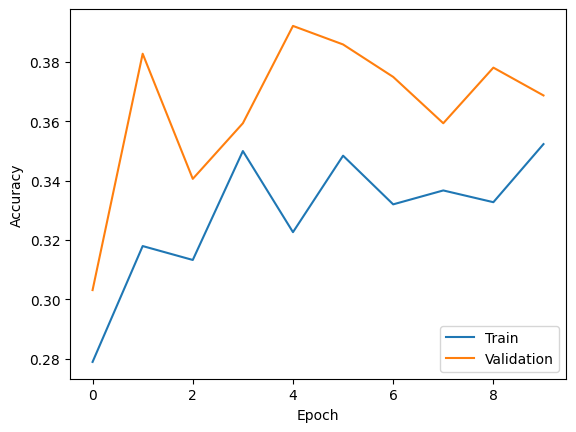

In [34]:
plotAccuracy(history1)

**Observations:**
- accuracy is low for training and validation data
- validation accuracy moves eratically and reaches 0.36 after 10 epochs
- training accuracy goes up slightly over the 10 epochs but stays below 0.36

possible reasons for poor performance:
- the model might be too simple to grasp the complicated patterns in the images
- amount of batches used in training might be too small (for training and for validation data)
- learning rate might be too high

**Fitting the same model, but with the color_mode="rgb" data**

In [35]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [36]:
# fitting the same model as above, changing only input_shape
def cnn_model_1a():

  cnn_1a = Sequential()
  cnn_1a.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 3)))  # changing input channel from 1 to 2 - rgb
  cnn_1a.add(BatchNormalization())
  cnn_1a.add(LeakyReLU(0.1))
  cnn_1a.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_1a.add(BatchNormalization())
  cnn_1a.add(LeakyReLU(0.1))
  cnn_1a.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_1a.add(GlobalAveragePooling2D())
  #cnn_1.add(Flatten())
  cnn_1a.add(Dense(32))
  cnn_1a.add(LeakyReLU(0.1))
  cnn_1a.add(Dense(4, activation = 'softmax'))


  return cnn_1a

In [37]:
cnn1a = cnn_model_1a()
print(cnn1a.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,468 (25.27 KB)

 Trainable params: 6,372 (24.89 KB)

 Non-trainable params: 96 (384.00 B)

None


In [38]:
cnn1a.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])

In [39]:
# Train model using dataset
#history1a = cnn1a.fit(train_generator2a, validation_data=validation_generator2,
#                      batch_size=128,
#                      steps_per_epoch=10, # training on only 10 batches per epoch
#                      validation_steps=5,
#                      epochs=10)

In [40]:
# Saving the weights and architecture to
#cnn1a.save('/content/drive/MyDrive/cnn1a.h5')


# saving the history
#with open('/content/drive/MyDrive/history1a.pkl', 'wb') as f:
#    pickle.dump(history1.history, f)


In [41]:
# loading the model
cnn1a = keras.models.load_model('/content/drive/MyDrive/cnn1a.h5')

# reloading the history
with open('/content/drive/MyDrive/history1a.pkl', 'rb') as f:
    history1a = pickle.load(f)

**Assessing accuracy**

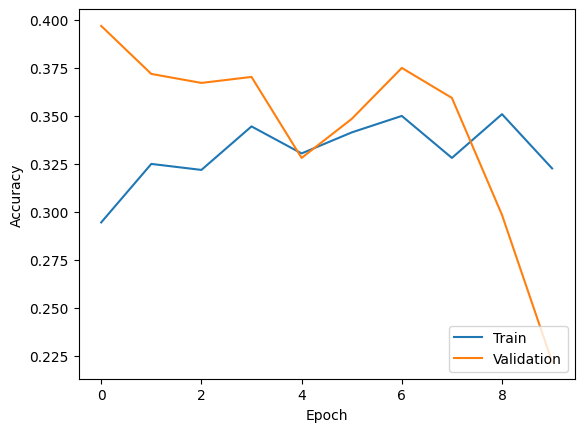

In [42]:
plotAccuracy(history1a)

### **Evaluating the Model on the Test Set**

**Observations:**
- with rgb as well, accuracy is low for training and validation data
- validation accuracy goes not up but down over the 10 epochs - from 0.4 at epoch 2 to 0.22 after 10 epochs.
- training accuracy goes up slightly over the 10 epochs and but does not rise above 0.35.
- overall the validation accuracy after 10 epochs is higher for the model using the data with color_mode = "grayscale" as input than for the model using color_mode = "rgb".

**Making Predictions and evaluating the model on the test set**

I am using cnn1 since its validation accuracy after 10 epochs is higher than the one for cnn1a.

In [43]:
y_pred_test1 = cnn1.predict(test_generator1) # prediction on test data

print(y_pred_test1[0]) # printing label prediction for the first picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[0.28843254 0.250308   0.26474535 0.1965141 ]


In [44]:
# Converting probabilities to class labels
y_pred_test1_label = np.argmax(y_pred_test1, axis = 1) # choosing the label with the highest probability
print(y_pred_test1_label[0]) # printing the predicted label for the first picture

0


In [45]:
# extracting the test labels
true_test_labels_gray = test_generator1.classes

              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



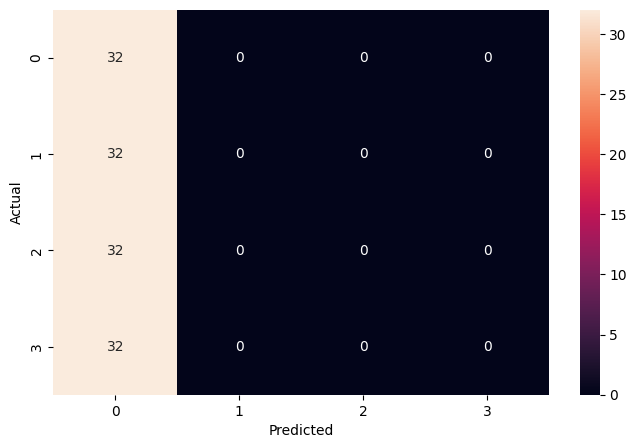

In [46]:
printConfusionClassification(true_test_labels_gray, y_pred_test1_label)

**Observations:**

The model defaults to classifying every image in the test dataset as class 0 "happy"  and does not recognize any patterns in the images. This is visible in the confusion matrix and also in the metrics: precision is 0 for all classes except for class 0 where it is 0.25 - 0.25 of all positives are true because 25% of the test data belongs to class 0. Similarly recall is 1 for class 0: all the positives for class 0 are true.

### **Creating the second Convolutional Neural Network**

- trying out a slightly larger architecture

In [47]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [48]:
def cnn_model_2():

  cnn_2 = Sequential()
  cnn_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1)))  # first convolutional layer with 16 filters and 1 input channel for the images
  cnn_2.add(LeakyReLU(0.1))                                                                           # first leaky ReLU layer
  cnn_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))                             # second convolutional layer with 32 filters
  cnn_2.add(LeakyReLU(0.1))                                                                           # second leaky ReLU layer
  cnn_2.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features
  cnn_2.add(BatchNormalization())                                                                     # Batch normalization for stability and regularization
  cnn_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))                             # third convolutional layer
  cnn_2.add(LeakyReLU(0.1))
  cnn_2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))                             # fourth convolutional layer
  cnn_2.add(LeakyReLU(0.1))
  cnn_2.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features
  cnn_2.add(BatchNormalization())                                                                     # second Batch normalization

  cnn_2.add(Flatten())                                                                                # flatten layer before passing data on into dense layer
  cnn_2.add(Dense(32))                                                                                # dense hidden layer
  cnn_2.add(LeakyReLU(0.1))
  cnn_2.add(Dropout(0.5))                                                                             # dropout for regularization
  cnn_2.add(Dense(4, activation = 'softmax'))

  return cnn_2

In [49]:
cnn2 = cnn_model_2()
print(cnn2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,004 (1.25 MB)

 Trainable params: 327,812 (1.25 MB)

 Non-trainable params: 192 (768.00 B)

None


### **Compiling and Training the Model**

In [50]:
 cnn2.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])

In [51]:
#history2 = cnn2.fit(train_generator1a, validation_data=validation_generator1, batch_size=128,
#                    #steps_per_epoch=5,        # training on only 5 batches per epoch
#                    #validation_steps=2,
#                    epochs=10)

In [52]:
# Saving the model
#cnn2.save('/content/drive/MyDrive/cnn2.h5')


# saving the history
#with open('/content/drive/MyDrive/history2.pkl', 'wb') as f:
#    pickle.dump(history2.history, f)


In [53]:
# loading the model
cnn2 = keras.models.load_model('/content/drive/MyDrive/cnn2.h5')

# reloading the history
with open('/content/drive/MyDrive/history2.pkl', 'rb') as f:
    history2 = pickle.load(f)


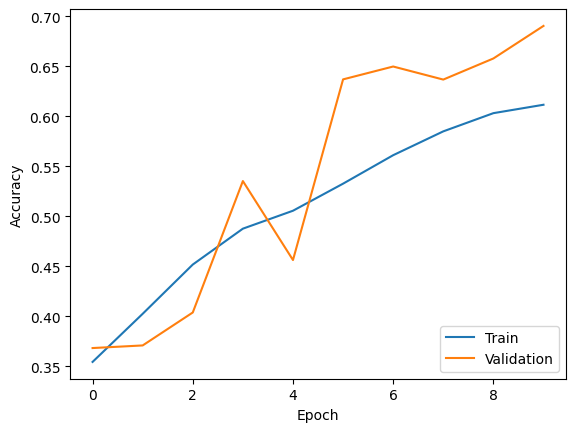

In [54]:
plotAccuracy(history2)

**Observations:**
- accuracy is higher for training and validation data than it was in simpler models before - more complex architecture seems to grasp patterns in data better than the first cnn architecture did
- training accuracy and validation accuracy both rise but validation accuracy rises a bit more eratically and is constantly higher than training accuracy after 6 epochs

**possible improvements**
- increasing complexity but also add more normalization and dropout layers to prevent overfit
- increasing number of batches (training and validation data) in each epoch
- adding more epochs since performance still seems to go up after 10 epochs
- trying out larger filter sizes for the convolutional filters
- furter increasing batch size when fitting the model

**Fitting the same model, but with the color_mode="rgb" data**

In [55]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [56]:
def cnn_model_2a():

  cnn_2a = Sequential()
  cnn_2a.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 3)))  # changing input shape from 1 to 3 channels
  cnn_2a.add(LeakyReLU(0.1))
  cnn_2a.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_2a.add(LeakyReLU(0.1))
  cnn_2a.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_2a.add(BatchNormalization())
  cnn_2a.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_2a.add(LeakyReLU(0.1))
  cnn_2a.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
  cnn_2a.add(LeakyReLU(0.1))
  cnn_2a.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_2a.add(BatchNormalization())

  cnn_2a.add(Flatten())
  cnn_2a.add(Dense(32))
  cnn_2a.add(LeakyReLU(0.1))
  cnn_2a.add(Dropout(0.5))
  cnn_2a.add(Dense(4, activation = 'softmax'))

  return cnn_2a

In [57]:
cnn2a = cnn_model_2a()
print(cnn2a.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,292 (1.25 MB)

 Trainable params: 328,100 (1.25 MB)

 Non-trainable params: 192 (768.00 B)

None


In [58]:
cnn2a.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])

In [59]:
#history2a = cnn2a.fit(train_generator2a,
#                      validation_data=validation_generator2,
#                      batch_size=128,
#                      #steps_per_epoch=5,        # training on only 5 batches per epoch
#                      #validation_steps=2,
#                      epochs=10)

In [60]:
# Saving the model
#cnn2a.save('/content/drive/MyDrive/cnn2a.h5')

# saving the history
#with open('/content/drive/MyDrive/history2a.pkl', 'wb') as f:
#    pickle.dump(history2a.history, f)

In [61]:
# loading the model back
cnn2a = keras.models.load_model('/content/drive/MyDrive/cnn2a.h5')

# reloading the history
with open('/content/drive/MyDrive/history2a.pkl', 'rb') as f:
    history2a = pickle.load(f)

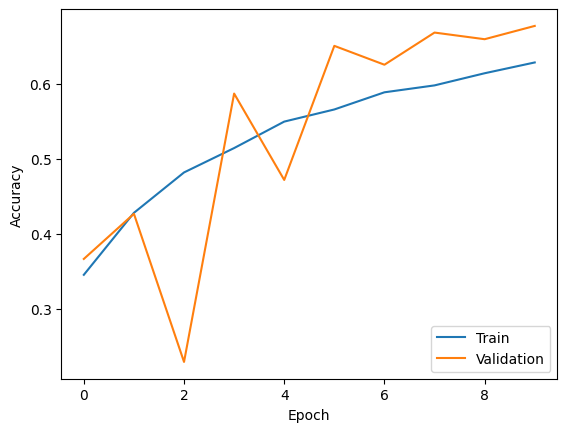

In [62]:
plotAccuracy(history2a)

**Observations:**
- again, accuracy is higher for training and validation data than it was in simpler models before
- training accuracy moves at an even pace and again, validation accuracy moves more eratically but rises above training accuracy at epoch 6

- validation accuracy is slightly higher (0.69 vs. 0.67) for the model trained with the data with color_mode = "grayscale" than for the model trained with color_mode = "rgb"
- performance develos almost identical to performance in cnn2 using 1 input channel above

### **Evaluating the Model on the Test Set**

I am using cnn2 for this because its validation accuracy after 10 epochs is slightly higher than the one of cnn2a.

In [63]:
y_pred_test2 = cnn2.predict(test_generator1) # prediction on test data

print(y_pred_test2[0]) # printing label prediction for the first picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.8775975  0.05270528 0.02657064 0.04312658]


In [64]:
# Converting probabilities to class labels
y_pred_test2_label = np.argmax(y_pred_test2, axis = 1) # choosing the label with the highest probability
print(y_pred_test2_label[0]) # printing the predicted label for the first picture

0


              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.60      0.78      0.68        32
           2       0.56      0.44      0.49        32
           3       0.88      0.88      0.88        32

    accuracy                           0.70       128
   macro avg       0.71      0.70      0.70       128
weighted avg       0.71      0.70      0.70       128



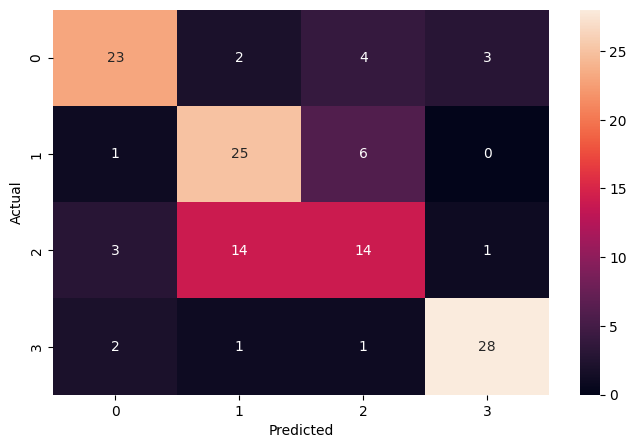

In [65]:
printConfusionClassification(true_test_labels_gray, y_pred_test2_label)

**Observations:**
- test accuracy is slightly higher than validation accuracy for cnn2 at 0.7. Differences in precision and recall between the classes are visible; class 3 "surprise" seems easiest for the model to identify in spite of it being underrepresented in the training data. Precision and recall for the "surprise" class are both at 0.88, meaning that 88% of the positives the model identified for this class are correct and that the model managed to identify 88% of the images labeled "surprise". Metrics for class 2 ("sad") are lowest and it is visible in the confusion matrix as well, that the model is making most mistakes identifying the images in this class.

- the overall high accuracy on the test set indicates that the model generalizes well to the test data.
- even though accuracy of 0.7 on the test set for a problem like this is a good result, overall performance of the model could be higher. Possible fixes would be increasing model complexity but also including more regularization and Dropout layers into the architecture. It might also make sense to train the model for more epochs, since validation and training accuracy were still rising after 10 epochs.

### **Possible reasons for the unsatisfactory performance of the models built so far:**
- the models are too simple to grasp the complex information in the image data and a more complex architecture is needed to identify patterns in the images more reliably
- the data itself:
 - a lot of variety is shown within the different emotions portrayed, making every emotion more complex to learn
 - the labeleling of the images is sometimes not perfect / biased; for example I myself would have labeled some of the images shown in the "sad" class as "neutral" and vice versa.

#### **impact of the different color modes:**
color_mode = "grayscale" showed slightly better performance in the simple and in the more complicated CNN architecture. Also, the model trained slightly faster if the input was the color_mode = "grayscale" data. Reason for this is probably, that the images themselves are grayscale, so adding the color channels does only add two identical channels on top but no additional information is added. So using color_mode = "rgb" here does not make sense in models built from scratch, where I can adjust the input shape expected by the model myself. The "rgb" color is only needed when it is expected by a pretrained architecture where I can not adjust the expected input shape.


## **Transfer Learning Architectures**

### **Creating new Data Loaders for Transfer Learning Architectures**


In [66]:
# defining the ImageDataGenerator with data augmentation to help with generalization and overall performance
train_datagen1a = ImageDataGenerator(rescale=1. / 255.0,
                                    horizontal_flip = True,
                                    vertical_flip = False,
                                    height_shift_range= 0.1,
                                    width_shift_range=0.1,
                                    rotation_range=20,
                                    shear_range = 0.1,
                                    zoom_range=0.1)

val_test_datagen1  = ImageDataGenerator(rescale = 1.0/255.)


In [67]:
# Flowing training images using train_datagen generator

train_generator2a = train_datagen1a.flow_from_directory(train_dir,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    color_mode = 'rgb',
                                                     target_size=(224,224),
                                                     classes = ["happy","neutral","sad","surprise"],
                                                      shuffle = True
                                                        )

# Flowing validation images using test_val_datagen generator
validation_generator2 =  val_test_datagen1.flow_from_directory(validation_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'rgb',
                                                         target_size=(224,224),
                                                          classes = ["happy","neutral","sad","surprise"],
                                                          shuffle = True
                                                               )


# Flowing validation images using test_val_datagen generator
test_generator2 =  val_test_datagen1.flow_from_directory(test_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'rgb',
                                                         target_size=(224,224),
                                                         classes = ["happy","neutral","sad","surprise"],
                                                         shuffle=False
                                                         )

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Model building**

In [68]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [69]:
model = VGG16(weights='imagenet')  # importing the model with the pretrained weights
model.summary()   # looking at model architecture and parameters

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# taking the layers from the first 3 blocks
transfer_layer = model.get_layer('block3_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)
vgg_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 1,735,488 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# freezing all vgg layers
for layer in vgg_model.layers:
    layer.trainable = False

In [72]:
transfer_model_vgg1 = Sequential()

transfer_model_vgg1.add(vgg_model)     # adding the 3 VGG16 blocks

transfer_model_vgg1.add(Flatten())      # adding a flatten layer

# adding dense layers
transfer_model_vgg1.add(Dense(32))
transfer_model_vgg1.add(BatchNormalization())
transfer_model_vgg1.add(LeakyReLU(0.1))
transfer_model_vgg1.add(Dropout(0.2))
transfer_model_vgg1.add(Dense(32, activation='relu'))
transfer_model_vgg1.add(Dropout(0.2))
transfer_model_vgg1.add(Dense(4, activation='softmax'))

### **Compiling and training**

In [73]:
transfer_model_vgg1.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0005), metrics=['accuracy'])

In [74]:
#history3 = transfer_model_vgg1.fit(train_generator2a, validation_data=validation_generator2,
#                                   steps_per_epoch=10,        # training on only 10 batches per epoch for speed
#                                   validation_steps=5,
#                                   epochs=10)

In [75]:
# Saving the model
#transfer_model_vgg1.save('/content/drive/MyDrive/transfer_model_vgg1.h5')


# saving the history
#with open('/content/drive/MyDrive/history3.pkl', 'wb') as f:
#    pickle.dump(history3.history, f)

In [76]:
# loading the model back
transfer_model_vgg1 = keras.models.load_model('/content/drive/MyDrive/transfer_model_vgg1.h5')

# reloading the history
with open('/content/drive/MyDrive/history3.pkl', 'rb') as f:
    history3 = pickle.load(f)


### **Evaluating the VGG16 model**

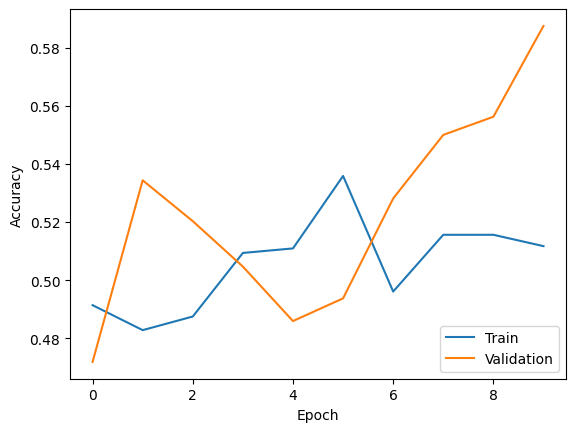

In [77]:
plotAccuracy(history3)

**Observations:**
- training and validation accuracy are both lower than for the cnn2a (the more complex cnn trained on data with input_shape = "rgb") model after 10 epochs. - 0.58 as opposed to 0.67 for the validation accuracy and only 0.51 as opposed to 0.63.
- validation and training accuracy do not move toghether. Both move erratically over the first 5 epochs but then validation accuracy starts to rise from 0.49 to 0.58 while training accuracy first drops to 0.49 and then rises only slightly over the remaining epochs.
- reason for this erratic behavior could be that the learning rate is too high.
- reasons for the poorer performance on the training set than on the validation set could be the  Dropout and Bacht Normalization layers and also the fact that I used data augmentation on the training set, making the training set hard to fit.
- it would also be interesting to see how performance changes if I imported a larger part of VGG16

**Evaluating the model on the test set:**

In [78]:
y_pred_test3 = transfer_model_vgg1.predict(test_generator2) # prediction on test data

print(y_pred_test3[0]) # printing label prediction for the first picture


y_pred_test3_label = np.argmax(y_pred_test3, axis = 1) # Converting probabilities to class labels

print(y_pred_test3_label[0]) # printing the predicted label for the first picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
[0.30359578 0.26794663 0.22728156 0.20117605]
0


In [79]:
true_test_labels_rgb = test_generator2.classes

              precision    recall  f1-score   support

           0       0.81      0.53      0.64        32
           1       0.64      0.28      0.39        32
           2       0.51      0.78      0.62        32
           3       0.57      0.78      0.66        32

    accuracy                           0.59       128
   macro avg       0.63      0.59      0.58       128
weighted avg       0.63      0.59      0.58       128



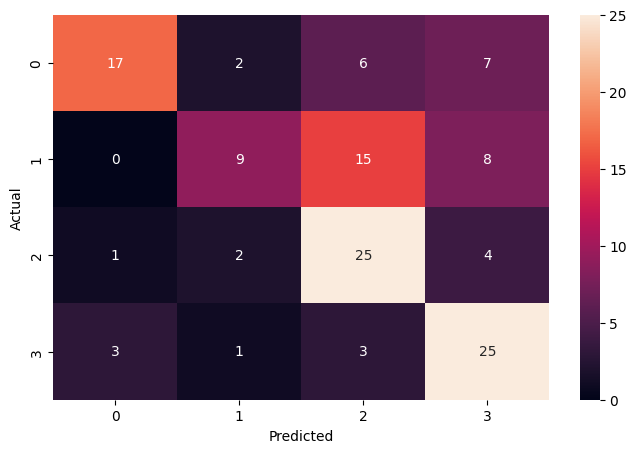

In [80]:
printConfusionClassification(true_test_labels_rgb, y_pred_test3_label)

**Observations:**
- test accuracy is similar to validation accuracy after 10 epochs (0.59 vs. 0.58). Performance on the test set overall is lower than for the more complex CNN model built from scratch.
-Differences in precision and recall between the classes are visible again: class 3 "surprise" and class 2 "sad" are best recognized by the model. Precision and recall differ between classes: precision is highest for 0 "happy", meaning that the model makes the fewest mistakes when identifying positives for class "happy". Recall is highest for classes "sad" and "surprise" which means that the model identiefied most of the positives in these classes. Recall is lowest for classe "neutral"; the model identified only 9 out of 32 true positives for this class.


- Here as well a possible fix would be to make the model more complex and also in this case validation accuracy is still rising strongly after 10 epochs so it would be sensible to train the model for more epochs until accuracy on the validation set plateaus.

### **Adding my own architecture on top of the VGG16 transfer layers:**

I am making the following changes to the vgg transfer learning model above:

- adding  convolutional layer as well as a batch normalization layer on top of the VGG16 blocks

In [81]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [82]:
transfer_model_vgg1a = Sequential()

transfer_model_vgg1a.add(vgg_model)     # adding the 3 VGG16 blocks


transfer_model_vgg1a.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
transfer_model_vgg1a.add(BatchNormalization())
transfer_model_vgg1a.add(LeakyReLU(0.1))
#transfer_model_vgg1a.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
#transfer_model_vgg1a.add(BatchNormalization())
#transfer_model_vgg1a.add(LeakyReLU(0.1))
transfer_model_vgg1a.add(MaxPooling2D(pool_size = (2, 2)))

transfer_model_vgg1a.add(Flatten())

#transfer_model_vgg1a.add(GlobalAveragePooling2D())    # Global Average Pooling instead of Flatten layer

# adding dense layers
transfer_model_vgg1a.add(Dense(32))
transfer_model_vgg1a.add(BatchNormalization())
transfer_model_vgg1a.add(LeakyReLU(0.1))
transfer_model_vgg1a.add(Dropout(0.2))
transfer_model_vgg1a.add(Dense(32, activation='relu'))
transfer_model_vgg1a.add(Dropout(0.2))
transfer_model_vgg1a.add(Dense(4, activation='softmax'))

In [83]:
#transfer_model_vgg1a.summary()

In [84]:
transfer_model_vgg1a.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

In [85]:
#history3a = transfer_model_vgg1a.fit(train_generator2a,
#                                     validation_data=validation_generator2,
#                                     steps_per_epoch=10,
#                                     validation_steps=5,
#                                     epochs=10)

In [86]:
# Saving the model
#transfer_model_vgg1a.save('/content/drive/MyDrive/transfer_model_vgg1a.h5')


# saving the history
#with open('/content/drive/MyDrive/history3a.pkl', 'wb') as f:
#    pickle.dump(history3a.history, f)

In [87]:
# loading the model back
transfer_model_vgg1a = keras.models.load_model('/content/drive/MyDrive/transfer_model_vgg1a.h5')

# reloading the history
with open('/content/drive/MyDrive/history3a.pkl', 'rb') as f:
    history3a = pickle.load(f)

**Evaluating Performance of the expanded model:**

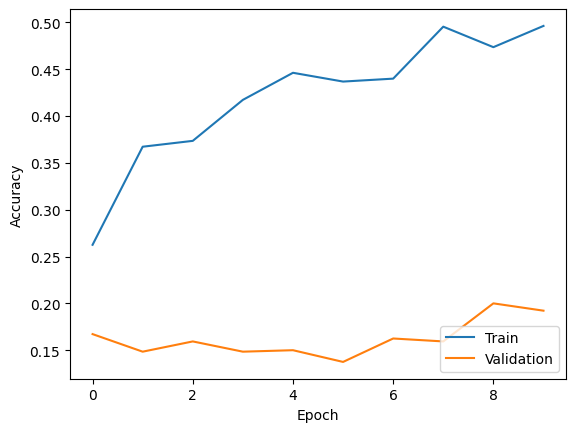

In [88]:
plotAccuracy(history3a)

Evaluating performance on the test set:

In [89]:
transfer_model_vgg1a.evaluate(test_generator2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2734 - loss: 2.2181


[2.2181029319763184, 0.2734375]

**Observations:**
- accuracy on the validation and the test set are lower for the VGG16 transfer layer architecture without the additional convolution layer on top.
- also the model is now overfitting strongly with validation accuracy at 0.19, test accuracy at 0.27 and training accuracy at 0.59 after 10 epochs.
the added complexity did not enable the model to fit the training data better but only led to a worse fit on unseen data

## **ResNet V2 Model**

In [90]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Model Building**

In [91]:
resnet = ResNet50V2(
    include_top=False,
    input_shape=(224, 224, 3),
    #pooling='avg', # This gives you a 2048-dimensional output vector
    weights='imagenet')

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [92]:
resnet_transfer_layer = resnet.get_layer('conv2_block3_out')    # taking the first 3 blocks out of the resnetv2 model

resnet_model = Model(inputs=resnet.input, outputs=resnet_transfer_layer.output)

resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 227,328 (888.00 KB)

 Trainable params: 225,408 (880.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [93]:
# freezing the imported layers
for layer in resnet_model.layers:
    layer.trainable = False

To improve generalization I am adding more normalization and dropout layers here than I did with the VGG16 model.

In [94]:
transfer_model_resnet = Sequential()

transfer_model_resnet.add(resnet_model)     # adding the imported resnet v2 layers

transfer_model_resnet.add(Flatten())      # adding a flatten layer

# adding dense layers and normalization and dropout layers
transfer_model_resnet.add(Dense(32))
transfer_model_resnet.add(BatchNormalization())
transfer_model_resnet.add(LeakyReLU(0.1))
transfer_model_resnet.add(Dropout(0.3))
transfer_model_resnet.add(Dense(32))
transfer_model_resnet.add(BatchNormalization())
transfer_model_resnet.add((LeakyReLU(0.1)))
transfer_model_resnet.add(Dropout(0.3))
transfer_model_resnet.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

In [95]:
transfer_model_resnet.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [96]:
#history4 = transfer_model_resnet.fit(train_generator2a, validation_data=validation_generator2, batch_size=128,steps_per_epoch=10,
#    validation_steps=5, epochs=10)

In [97]:
# Saving the model
#transfer_model_resnet.save('/content/drive/MyDrive/transfer_model_resnet.h5')

# saving the history
#with open('/content/drive/MyDrive/history4.pkl', 'wb') as f:
#    pickle.dump(history4.history, f)

In [98]:
# loading the model back
transfer_model_resnet = keras.models.load_model('/content/drive/MyDrive/transfer_model_resnet.h5')

# reloading the history
with open('/content/drive/MyDrive/history4.pkl', 'rb') as f:
    history4 = pickle.load(f)

### **Evaluating the ResNet Model**

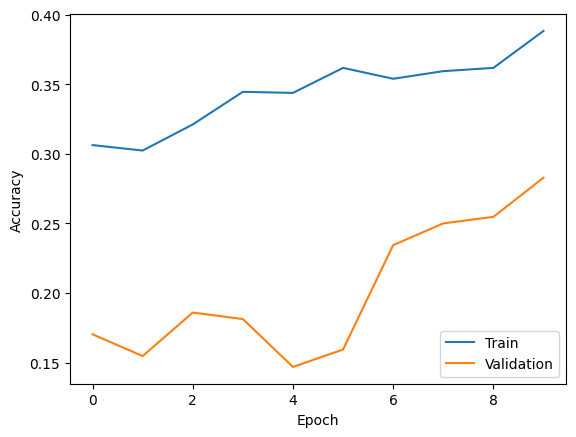

In [99]:
plotAccuracy(history4)

**Evaluating the model on the test data**

In [100]:
transfer_model_resnet.evaluate(test_generator2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3281 - loss: 2.1483


[2.148343563079834, 0.328125]

**Observations:**

- training, validation and test accuracy for the ResNet model are both lower than for the cnn2a (the more complex cnn trained on data with input_shape = "rgb") and are also lower than the accuracy of the VGG16 model. (validation accuracy = 0.28 after 10 epochs  as opposed to 0.58 for the VGG16 model, test accuracy down to 0.33 vs. 0.59 and training accuracy = 0.39 as opposed to 0.51 for the VGG16 model)
- the model is overfitting the training data as training accuracy is consistently higher for all epochs.
- after 10 epochs both training and validation accuracy are still rising
- a possible measure to curb overfitting would be to either reduce complexity, although that might also have a negative impact on training accuracy, or to add more normalization / dropout layers
- for this model as well, it would be interesting to see how accuracy develops after more epochs

**Adding further layers on top of the ResNetV2 transfer learning model to try and improve performance.**

I am changing the following components:
- adding more convolutional layers and also normalization layers to prevent overfit
- increasing the width of some dense layers (64 instead of 32)
- using Global Average Pooling instead of Flatten() to help against overfit and reduce the size of the output tensor of the convolutional layers
- reducing the dropout rate in the dropout layers to 0.1
- adding two more Dense layers
- adding an additional block of the ResNetV2 model

In [101]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [102]:
resnet_transfer_layer1a = resnet.get_layer('conv3_block1_out')    # taking more layers out of ResNetV2

resnet_model1a = Model(inputs=resnet.input, outputs=resnet_transfer_layer1a.output)

In [103]:
# freezing the imported layers
for layer in resnet_model1a.layers:
    layer.trainable = False

In [104]:
transfer_model_resnet1a = Sequential()

transfer_model_resnet1a.add(resnet_model)     # adding the imported resnet v2 layers

# adding several convolutional layers, using LeakyReLu as activation and BatchNormalization layers for stability and regularization
transfer_model_resnet1a.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
transfer_model_resnet1a.add(BatchNormalization())
transfer_model_resnet1a.add(LeakyReLU(0.1))

transfer_model_resnet1a.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
transfer_model_resnet1a.add(BatchNormalization())
transfer_model_resnet1a.add(LeakyReLU(0.1))

transfer_model_resnet1a.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
transfer_model_resnet1a.add(BatchNormalization())
transfer_model_resnet1a.add(LeakyReLU(0.1))

transfer_model_resnet1a.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
transfer_model_resnet1a.add(BatchNormalization())
transfer_model_resnet1a.add(LeakyReLU(0.1))
transfer_model_resnet1a.add(MaxPooling2D(pool_size = (2, 2)))     # adding a max pooling layer after the convolutions to reduce dimensions

transfer_model_resnet1a.add(GlobalAveragePooling2D())             # adding a Global Average Pooling layer before the Dense block


# adding dense layers and more normalization and dropout layers than I did with VGG16
transfer_model_resnet1a.add(Dense(64))
transfer_model_resnet1a.add(BatchNormalization())
transfer_model_resnet1a.add(LeakyReLU(0.1))
transfer_model_resnet1a.add(Dropout(0.1))
transfer_model_resnet1a.add(Dense(64))
transfer_model_resnet1a.add(BatchNormalization())
transfer_model_resnet1a.add((LeakyReLU(0.1)))
transfer_model_resnet1a.add(Dropout(0.1))
transfer_model_resnet1a.add(Dense(32))
transfer_model_resnet1a.add(LeakyReLU(0.1))
transfer_model_resnet1a.add(Dense(32))
transfer_model_resnet1a.add(LeakyReLU(0.1))
transfer_model_resnet1a.add(Dense(4, activation='softmax'))

In [105]:
transfer_model_resnet1a.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional (Functional)         │ (None, 28, 28, 256)    │       227,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 369,412 (1.41 MB)

 Trainable params: 141,444 (552.52 KB)

 Non-trainable params: 227,968 (890.50 KB)

In [106]:
transfer_model_resnet1a.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [107]:
#history4a = transfer_model_resnet1a.fit(train_generator2a, validation_data=validation_generator2,
#                                        steps_per_epoch=10,
#                                        validation_steps=5,
#                                        epochs=20)

In [108]:
# Saving the model
#transfer_model_resnet1a.save('/content/drive/MyDrive/transfer_model_resnet1a.h5')

# saving the history
#with open('/content/drive/MyDrive/history4a.pkl', 'wb') as f:
#    pickle.dump(history4a.history, f)

In [109]:
# loading the model back
transfer_model_resnet1a = keras.models.load_model('/content/drive/MyDrive/transfer_model_resnet1a.h5')

# reloading the history
with open('/content/drive/MyDrive/history4a.pkl', 'rb') as f:
    history4a = pickle.load(f)

**Plotting train and validation accuracy:**

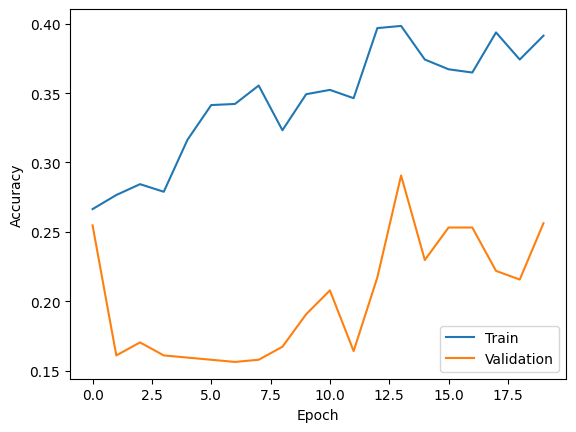

In [110]:
plotAccuracy(history4a)

**Observations:**
- after adding the additional layers performance of the more complex model is worse after 10 epochs than the performance of the more simple architecture
- after 20 epochs train and validation accuracy are about where they were for the simpler model after 10 epochs.
-the model does overfit - validation accuracy is lower than training accuracy but the performance on the training set is low as well.

- the fact that the model overfits the training data might be an indicator that the very large architecture is too complex for the training data at hand
 - possible fixes would be reducing the number of layers, adding higher dropout rates and augmenting the data even more or adding more training images to the data.
- the low performance on the training set however, indicates that even though the architechture is so large, it does not grasp the patterns in the training data well.
 - a possible reason for this is, the fact that the effiecient net model was trained on imagenet data which consists of many differnet categories, not just of faces. Here unfreezing some layers and finetuning the model might help.

## **EfficientNet Model**

In [111]:
backend.clear_session()  # clearing backend

# setting a random seed
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

- Importing EfficientNetB0 as the most simple architecture in the EfficientNet family with input shape (224,224) pixels.

In [112]:
from tensorflow.keras.applications import EfficientNetB0
enet = EfficientNetB0(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [113]:
enet_transfer_layer = enet.get_layer('block2b_add')    # taking the first 2 blocks out of the EffiecientNet model

enet_model = Model(inputs=enet.input, outputs=enet_transfer_layer.output)

enet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 20,313 (79.35 KB)

 Trainable params: 19,090 (74.57 KB)

 Non-trainable params: 1,223 (4.78 KB)

In [114]:
# freezing the imported layers
for layer in enet_model.layers:
    layer.trainable = False

In [115]:
transfer_model_enet = Sequential()

transfer_model_enet.add(enet_model)     # adding the imported resnet v2 layers

#transfer_model_enet.add(GlobalAveragePooling2D())
transfer_model_enet.add(Flatten())              # adding a flatten layer

# adding dense layers as well as normalization and dropout layers
transfer_model_enet.add(Dense(32))
transfer_model_enet.add(BatchNormalization())
transfer_model_enet.add(LeakyReLU(0.1))
transfer_model_enet.add(Dropout(0.4))
transfer_model_enet.add(Dense(32))
transfer_model_enet.add(BatchNormalization())
transfer_model_enet.add((LeakyReLU(0.1)))
transfer_model_enet.add(Dropout(0.3))
transfer_model_enet.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

introducing early stopping to prevent the model from overfitting, save computational cost and reduce training time.

In [116]:
callbacks = [
    EarlyStopping(patience=5,                 # early stopping if accuracy does not improve for two epochs in a row
                  restore_best_weights=True), # restoring the weights from the epochs with highest accuracy
    ReduceLROnPlateau(patience=2, factor=0.5) # reduces learning rate as model nears optimum
]

In [117]:
transfer_model_enet.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

In [118]:
#history5 = transfer_model_enet.fit(train_generator2a, validation_data=validation_generator2,
#                                   batch_size=128,steps_per_epoch=10,        # training on only 10 batches per epoch for speed
#                                   validation_steps=5,
#                                   epochs=10,
#                                   callbacks=callbacks)

In [119]:
# Saving the model
#transfer_model_enet.save('/content/drive/MyDrive/transfer_model_enet.h5')

# saving the history
#with open('/content/drive/MyDrive/history5.pkl', 'wb') as f:
#    pickle.dump(history5.history, f)

In [120]:
# loading the model back
transfer_model_enet = keras.models.load_model('/content/drive/MyDrive/transfer_model_enet.h5')

# reloading the history
with open('/content/drive/MyDrive/history5.pkl', 'rb') as f:
    history5 = pickle.load(f)

### **Evaluating the EfficientnetNet Model**

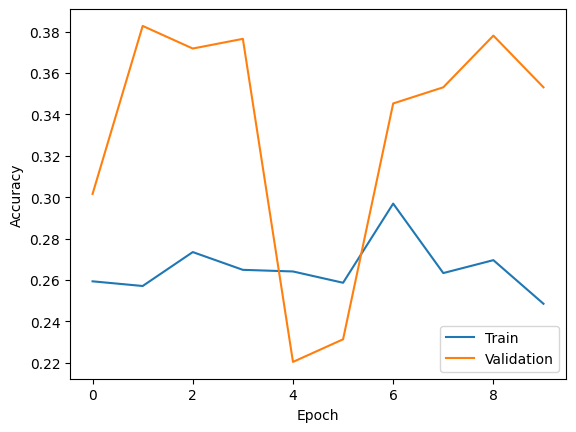

In [121]:
plotAccuracy(history5)

**Evaluating the model on the test data:**

In [122]:
y_pred_test4 = transfer_model_enet.predict(test_generator2) # prediction on test data

print(y_pred_test4[0]) # printing label prediction for the first picture


y_pred_test4_label = np.argmax(y_pred_test4, axis = 1) # Converting probabilities to class labels

print(y_pred_test4_label[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
[9.2584342e-03 3.8004335e-02 8.9895958e-04 9.5183831e-01]
3


In [123]:
true_test_labels_rgb = test_generator2.classes # extracting the test labels

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.25      1.00      0.40        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



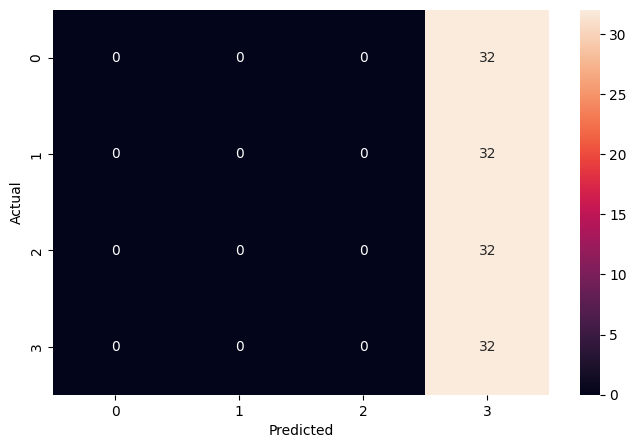

In [124]:
printConfusionClassification(true_test_labels_rgb, y_pred_test4_label)

**Observations:**
- the model is performing badly on the training, validation and test set.
- training accuracy does not rise over the 10 epochs of training but stays between 0.25 and and just above 0.3
- validation accuracy is higher for most epochs - just below 0.4 and drops between epoch 4 and 5 to then rise again
- test accuracy is 0.25: the model does not recognize any pattern in the test data but classifies each test image as class 3 "surprise" and therefore gets 25% of the predictions right as the test images are evenly distributed between the four classes. This can also be seen in the precision and recall metrics: recall is 1 for class 3 and 0 for all other classes: the model recognizes all the images which are labeled as "surprise" correctly but recognizes no other images. Precision for class 3 is 0.25 and 0 for the other classes: of the positives for class "surprise" 25% were true.

A possible reasons for the bad performance could be
- the model is not complex enough to recognize patterns in the training data
  - possible fixes for this could be using more layers of the EffiecientNet architecture
  - after adding more layers myself on top of the imported VGG16 and ResNet architecture had a negative effect on perfromance, it is unlikely that adding convolutional layers by hand here will have a positive effect
- the data the EfficientNet model was trained on (imagenet) does not only contain faces but many different data types so the EfficientNet lacks training for this particular problem.
  - a possible fix for this could be unfreezing some of the EfficientNet layers and finetuning the model on the training pictures of my dataset




### **Transfer Learning: Thoughts**

The overall performance of the Transfer Learning Architectures is not satisfactory with performance staying below 0.6 for all models. Of all the transfer learning models tried, the first version of the VGG 16 transfer learning model (without added convolutional layers) performs best with
training accuracy at 0.51, and accuracy on the validation ant test set at 0.59. The transfer learning models based on the ResNetV2 architecture perform worse with train accuracy stopping at 0.39, validation accuracy reaching only 0.28 and test accuracy only going up to 0.32 after 10 epochs. the transfer learning moder based on the EfficientNet architecture also perfroms worse than the VGG16 transfer learning model (train accuracy: 0.25, validation accuracy: 0.35, test accuracy: 0.25).

Performance of the VGG16 model becomes worse as I add more convolutional layers and the same happens when I add more convolutional layers on top of the imported ResnetV2 architecture. A possible reason could be that the additional convolutional layers interfere with the important architectures or are made obsolete by them. A better alternative to adding own convolutional layers on top would probably have been to finetune the imported layers using my training images.

The performance of all transfer learning architectures also falls short of the performance of the (more complex) cnn architectures that I built from scratch (cnn2 and cnn2a). Possible reasons for this could be, that the cnn architecture built from scratch is trained on the training images as opposed to many different kinds of images many of which are not relevant to the problem at hand. Another reason could be that the transfer learning models all take images in color_mode = "rgb", so that I have to convert the grayscale images in my data to rgb to fit the models, creating dublicate information in the 2 additional channels. Since the performance of cnn2 (trained on grayscale color_mode) and cnn2a (trained on rgb color_mode) are very similar, my assumption is, that the negative impact of converting grayscale images to rgb is not that high.

## **Building a Complex Neural Network Architecture from scratch**

- architecture will have only 1 input channel for our input images

Reusing my data loaders from the beginning:

In [125]:
# defining the ImageDataGenerator with data augmentation to help with generalization and overall performance
train_datagen1a = ImageDataGenerator(rescale=1. / 255.0,
                                    horizontal_flip = True,
                                    vertical_flip = False,
                                    height_shift_range= 0.1,
                                    width_shift_range=0.1,
                                    rotation_range=20,
                                    shear_range = 0.1,      # slant image in particular way
                                    zoom_range=0.1)               # rescaling to scale between 0 and 1


val_test_datagen1  = ImageDataGenerator(rescale = 1.0/255.)     # creating a separate Generator for train and validation set without data augmentation


train_generator1a = train_datagen1a.flow_from_directory(train_dir,
                                                    batch_size=128,                # read in images in batches
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(48,48),
                                                    classes = ["happy","neutral","sad","surprise"]
                                                        )

# Flowing validation images in batches of 20 using test_datagen generator
validation_generator1 =  val_test_datagen1.flow_from_directory(validation_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'grayscale',
                                                         target_size=(48,48),
                                                         classes = ["happy","neutral","sad","surprise"]
                                                               )


# Flowing validation images in batches of 20 using test_datagen generator
test_generator1 =  val_test_datagen1.flow_from_directory(test_dir,
                                                         batch_size=128,
                                                         class_mode  = 'categorical',
                                                         color_mode = 'grayscale',
                                                         target_size=(48,48),
                                                         classes = ["happy","neutral","sad","surprise"],
                                                         shuffle=False
                                                         )


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**
- I am re-using my more complex CNN (cnn2) that I built from scratch and making the following changes:
- adding a fifth convolutional layer.
- rewriting the model in the functional API to make the architecture more flexible https://keras.io/guides/functional_api/
- trying to include two skip connections similar to the skip connection in the ReNet model I used as a transfer learning model above to avoid vanishing gradients in this deeper network and just to experiment
- adding more batch normalization layers for stability
- replacing my Flatten() layer with a GlobalAveragePooling() layer to reduce the number of parameters and prevent overfitting


In [126]:
backend.clear_session()  # clearing backend

# setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [127]:
inputs = keras.Input(shape=(48, 48, 1))              # input shape of the grayscale images

x = layers.Conv2D(16, (3,3), padding="same")(inputs) # crating a new layer (new node in the functional API graph of layers) and feeding input into the new layer
x = LeakyReLU(0.1)(x)
x = layers.Conv2D(32, (3,3), padding="same")(x)
x = LeakyReLU(0.1)(x)
block_1_output = MaxPooling2D(pool_size = (2,2))(x) # saving output of the first block

x = layers.Conv2D(32, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.1)(x)
x = layers.Conv2D(32,(3,3), padding="same")(x)
x = BatchNormalization()(x)                         # new batch normalization layer
x = LeakyReLU(0.1)(x)
x = MaxPooling2D(pool_size = (2,2))(x)

block_2_output = layers.add([x, block_1_output])    # skip connection: adding the output of block 1 and the output of the layer before this one together

x = layers.Conv2D(32,(3,3), padding="same")(x)      # fifth convolutional layer
x = BatchNormalization()(x)                         # new batch normalization layer
x = LeakyReLU(0.1)(x)
x = layers.Conv2D(32,(3,3), padding="same")(x)      # fifth convolutional layer
x = BatchNormalization()(x)
x = LeakyReLU(0.1)(x)

block_3output = layers.add([x, block_2_output])    # skip connection: adding the output of block 2 and the output of the layer before this one together

x = layers.GlobalAveragePooling2D()(x)              # using Global Average Pooling instead of Flatten before the dense layers

x = layers.Dense(32)(x)
x = LeakyReLU(0.1)(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(4, activation="softmax")(x)

model6 = keras.Model(inputs, output)
model6.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 43,492 (169.89 KB)

 Trainable params: 43,236 (168.89 KB)

 Non-trainable params: 256 (1.00 KB)

### **Compiling and Training the Model**

In [128]:
model6.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

In [129]:
callbacks = [
    EarlyStopping(patience=5,
                  restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.5)
]

In [130]:
#history6 = model6.fit(train_generator1a, validation_data=validation_generator1, batch_size=128, epochs=10,callbacks=callbacks)

In [131]:
# Saving the model
#model6.save('/content/drive/MyDrive/model6.h5')

# saving the history
#with open('/content/drive/MyDrive/history6.pkl', 'wb') as f:
#    pickle.dump(history6.history, f)

In [132]:
# loading the model back
model6 = keras.models.load_model('/content/drive/MyDrive/model6.h5')

# reloading the history
with open('/content/drive/MyDrive/history6.pkl', 'rb') as f:
    history6 = pickle.load(f)

**Plotting the training and validation accuracy before I evaluate the model on the test set:**

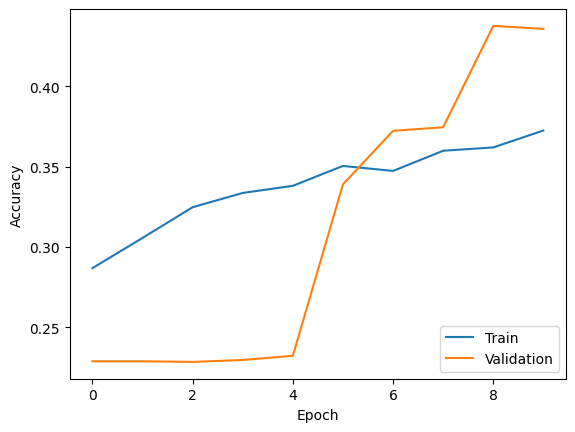

In [133]:
plotAccuracy(history6)

**Observations:**
- accuracy after 10 epochs is at 0.37 for training data and 0.43 for validation data
- model does not overfit but might be undercomplex for the problem
- accuracy still seems to be rising after 10 epochs.

### **Evaluating the Model on the Test Set**

In [134]:
y_pred_test6 = model6.predict(test_generator1) # prediction on test data

print(y_pred_test6[0]) # printing prediction for the first image

y_pred_test6_label = np.argmax(y_pred_test6, axis = 1) # converting probabilities to class labels

print(y_pred_test6_label[0]) # printing the label for the first image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
[0.3341072  0.29124555 0.21733369 0.15731362]
0


In [135]:
true_test_labels_gray = test_generator1.classes # extracting the test labels

**Plotting Confusion matrix and printing the classification report for model6:**

              precision    recall  f1-score   support

           0       0.40      0.72      0.52        32
           1       0.25      0.09      0.14        32
           2       0.41      0.38      0.39        32
           3       0.67      0.62      0.65        32

    accuracy                           0.45       128
   macro avg       0.43      0.45      0.42       128
weighted avg       0.43      0.45      0.42       128



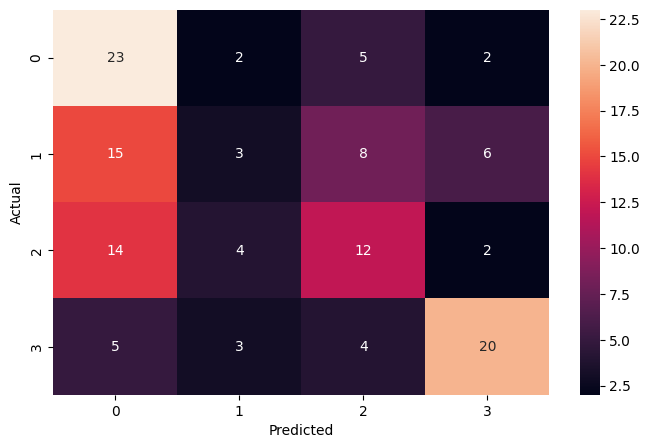

In [136]:
printConfusionClassification(true_test_labels_gray, y_pred_test6_label)

**Observations:**
- accuracy on the test set is 0.45 - not good but model seems to begin to see some patterns in the unseen data
- model classified most images correctly in class 0 "happy" (23 out of 32) and therefore recall is highest in class "happy" as well; model identifies 0.72 of all test images in the class
- precision is highest in class 3 "surprise" and recall is second highest for this class - this class also seems relatively easy to learn for the model

### **Adding a fifth convolutional block to cnn2 - the more complex architecture I built from scratch before**

In [137]:
backend.clear_session()  # clearing backend

# setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [138]:
def cnn_model_3():

  cnn_3 = Sequential()
  cnn_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1)))  # first convolutional layer with 16 filters
  cnn_3.add(LeakyReLU(0.1))                                                                           # first leaky ReLU layer

  cnn_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))                             # second convolutional layer with 32 filters
  cnn_3.add(BatchNormalization())
  cnn_3.add(LeakyReLU(0.1))                                                                           # second leaky ReLU layer
  cnn_3.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features

  cnn_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_3.add(LeakyReLU(0.1))

  cnn_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
  cnn_3.add(BatchNormalization())
  cnn_3.add(LeakyReLU(0.1))
  cnn_3.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features

  # adding a fifth convolutional block here including conv layer, batch norm, relu and also a max pooling layer to reduce dimensions
  cnn_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
  cnn_3.add(BatchNormalization())
  cnn_3.add(LeakyReLU(0.1))
  cnn_3.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features



  cnn_3.add(Flatten())                                                                                # flatten layer before passing data on into dense layer
  cnn_3.add(Dense(32))                                                                                # dense hidden layer
  cnn_3.add(LeakyReLU(0.1))
  cnn_3.add(Dropout(0.5))
  cnn_3.add(Dense(4, activation = 'softmax'))

  return cnn_3

In [139]:
cnn3 = cnn_model_3()
print(cnn3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,004 (562.52 KB)

 Trainable params: 143,684 (561.27 KB)

 Non-trainable params: 320 (1.25 KB)

None


In [140]:
cnn3.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

In [141]:
#history7 = cnn3.fit(train_generator1a, validation_data=validation_generator1,
#                                  batch_size=128,steps_per_epoch=10,        # training on only 10 batches per epoch for speed
#                                  validation_steps=5,
#                                  epochs=10,
#                                  callbacks=callbacks)

In [142]:
# Saving the model
#cnn3.save('/content/drive/MyDrive/cnn3.h5')

# saving the history
#with open('/content/drive/MyDrive/history7.pkl', 'wb') as f:
#    pickle.dump(history7.history, f)

In [143]:
# loading the model back
cnn3 = keras.models.load_model('/content/drive/MyDrive/cnn3.h5')

# reloading the history
with open('/content/drive/MyDrive/history7.pkl', 'rb') as f:
    history7 = pickle.load(f)

### **Evaluating the model**

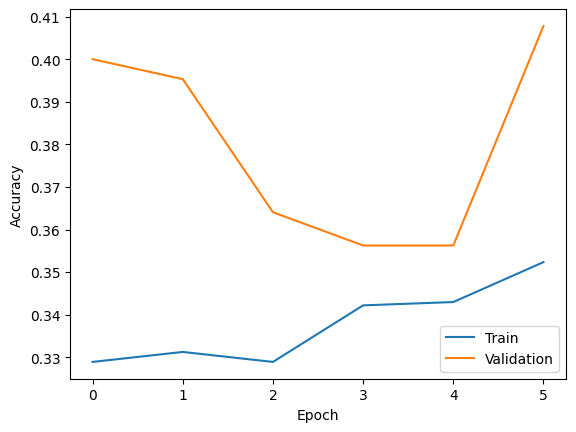

In [144]:
plotAccuracy(history7)

In [145]:
cnn3.evaluate(test_generator1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5391 - loss: 1.0750


[1.0750455856323242, 0.5390625]

- validation accuracy is at 0.4 after 10 epochs, test accuracy is lower at 0.25 and training accuracy is at 0.34 model trains only for 6 epochs before training is stopped due to lack of improvement in performance in the epochs after
- performance of cnn3 is worse than the one of cnn2 in spite of the more complex architecture. This is probably due to the limitation on the batches per epoch that I had to set to avoid runtime errors. With more computational power at hand, it would be interesting to see how this model does without that limitation.

### **Adding two more convolutional blocks to built a large CNN with 7 convolutional layers in total.**

In [146]:
backend.clear_session()  # clearing backend

# setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [147]:
def cnn_model_4():

  cnn_4 = Sequential()
  cnn_4.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1)))  # first convolutional layer with 16 filters
  cnn_4.add(LeakyReLU(0.1))                                                                           # first leaky ReLU layer

  cnn_4.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))                             # second convolutional layer with 32 filters
  cnn_4.add(BatchNormalization())
  cnn_4.add(LeakyReLU(0.1))                                                                           # second leaky ReLU layer
  cnn_4.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features

  cnn_4.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_4.add(LeakyReLU(0.1))

  cnn_4.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
  cnn_4.add(BatchNormalization())
  cnn_4.add(LeakyReLU(0.1))
  cnn_4.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features

  # adding a fifth convolutional block here including conv layer, batch norm, relu and also a max pooling layer to reduce dimensions
  cnn_4.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
  cnn_4.add(BatchNormalization())
  cnn_4.add(LeakyReLU(0.1))
  cnn_4.add(MaxPooling2D(pool_size = (2, 2)))                                                         # max pooling layer to reduce no of features

  # adding a sixth convolutional block
  cnn_4.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_4.add(BatchNormalization())
  cnn_4.add(LeakyReLU(0.1))
  cnn_4.add(MaxPooling2D(pool_size = (2, 2)))

   # adding a seventh convolutional block
  cnn_4.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  cnn_4.add(BatchNormalization())
  cnn_4.add(LeakyReLU(0.1))
  cnn_4.add(MaxPooling2D(pool_size = (2, 2)))


  cnn_4.add(Flatten())                                                                                # flatten layer before passing data on into dense layer
  cnn_4.add(Dense(32))                                                                                # dense hidden layer
  cnn_4.add(LeakyReLU(0.1))
  cnn_4.add(Dropout(0.5))
  cnn_4.add(Dense(4, activation = 'softmax'))

  return cnn_4

In [148]:
cnn4 = cnn_model_4()

In [149]:
cnn4.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

In [150]:
#warnings.filterwarnings("ignore")
#history8 = cnn4.fit(train_generator1a, validation_data=validation_generator1,
#                                  batch_size=128,
#                                  epochs=15,
#                                  callbacks=callbacks)



In [151]:
# Saving the model
#cnn4.save('/content/drive/MyDrive/cnn4.h5')

# saving the history
#with open('/content/drive/MyDrive/history8.pkl', 'wb') as f:
#    pickle.dump(history8.history, f)

In [152]:
# loading the model back
cnn4 = keras.models.load_model('/content/drive/MyDrive/best_model.h5')

# reloading the history
with open('/content/drive/MyDrive/history8.pkl', 'rb') as f:
    history8 = pickle.load(f)

### **Evaluating the model**

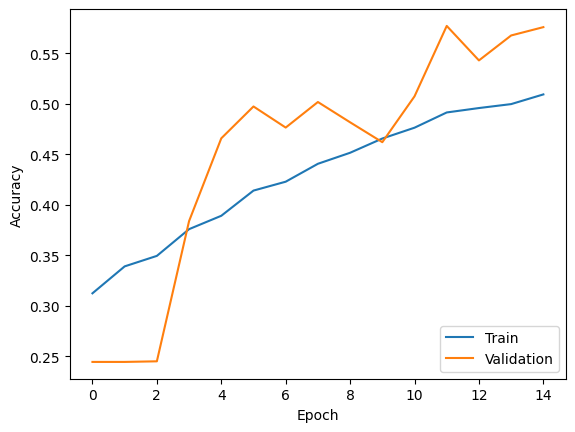

In [153]:
plotAccuracy(history8)

In [154]:
cnn4.evaluate(test_generator1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5469 - loss: 0.9597


[0.9596791863441467, 0.546875]

Validation accuracy is at 0.57 after 15 epochs, training accuracy is lower at 0.51 and test accuracy is at 0.54. The additional convolutional blocks and lifting the steps_per_epoch limit, seem to be improving model performance, even if accuracy still does not reach the accuracy of the much smaller cnn2 on neither the validation nor the test data.

## **Choosing the final model:**

Choosing cnn2, the more complex CNN model trained on the data with input_shape = (48,48,1).

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.60      0.78      0.68        32
           2       0.56      0.44      0.49        32
           3       0.88      0.88      0.88        32

    accuracy                           0.70       128
   macro avg       0.71      0.70      0.70       128
weighted avg       0.71      0.70      0.70       128



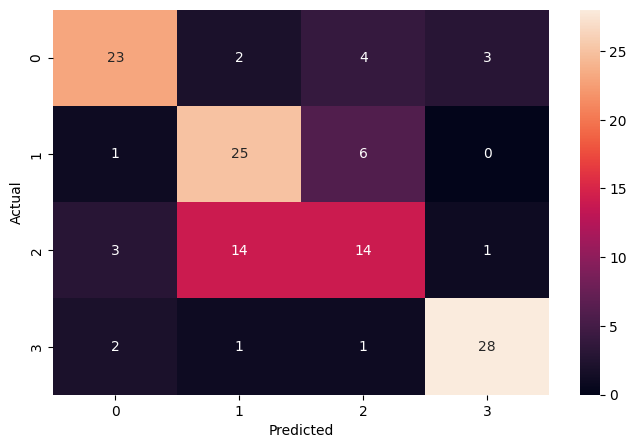

In [155]:
printConfusionClassification(true_test_labels_gray, y_pred_test2_label)

**Observations:**
- As mentioned above: test accuracy for cnn2 is at 0.7, which is the highest test accuracy for all the models I have tried out.
- the model recognizes most true positives in class 3 "surprise" (28 out of 32), recall = 0.88
- the model also makes fewes mistakes, classifying the positives in this class; precision = 0.88
- recall is second highest for class 1 "neutral" and third highest for class 0 "happy" so the surprise class seems easiest for the model to learn in spite of its underrepresentation in the training data.
- class 2 "sad" has lowest recall (0.44), possibly due to its subjective and sometimes misleading labeling.



## **Conclusion:**

### **Insights**

Most meaningful insights from the data are
- the data shape: data is grayscale with only one input channel, so it works best with models that accept data with only one channel as input
- the data quality: images are including pictures of cartoons instead of human faces and the quality of the labels is sometimes not perfect. This could have had a harmful impact on model training and performance.
- the amount of test data: test data contains only 128 images, leading to potentially unstable test metrics

### **Comparison of various techniques and their relative performance**:


The different techniques I tried perform very differently. The first very simple CNN was not complex enough to capture patterns in the data, the more complex Networks (cnn2 and cnn2a) both performed relatively well, the VGG 16 transfer learning architecture performed worse than the more complex CNN and the other two transfer learning architectures performend even worse. The two architectures I built myself after training the transfer learning models also could not reach the performance of the cnn models. An important reason for these more complex architectures falling short could be that I had to limit the amount of batches the model trained (and validated) when fitting those models due to runtime issues. It would be interesting to evaluate the performance of those models without that constraint. Similarly, training some of the more complex architectures for more epochs (or using early stopping for more models) would be interesting as validation accuracy still seemed to be going up for most models after 10 epochs. And there are dozens of hyperparameters that could be tuned more (learning rate, batch size, experimenting more with the number of convolutional layers with my own models, dropout rates etc.)

### **Proposal for the final solution design**:

As it is, I am proposing cnn2 (the more complex CNN architecture built from scratch, taking only 1 channel as input) as the best model since its performance is highest and it generalizes well to the training and the test set. An accuracy on the test set of 0.7 is not good enough to use cnn2 in production, but still accuracy of 0.7 is high, given the relatively simple architecture of the model. Its simplicity also means that cnn2 trains for a comparatively short time and with low computational effort.